In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('water.txt', delimiter='\t', index_col=1)

In [4]:
df.head()

,location,mortality,hardness
town,,,
Bath,South,1247,105
Birkenhead,North,1668,17
Birmingham,South,1466,5
Blackburn,North,1800,14
Blackpool,North,1609,18


In [5]:
df.shape

(61, 3)

In [6]:
from statsmodels.stats.weightstats import _tconfint_generic

In [7]:
mortality_mean = df.mortality.mean()
mortality_std_mean  = df.mortality.std(ddof=1)/np.sqrt(len(df.mortality))
t_interval = _tconfint_generic(mortality_mean, mortality_std_mean, len(df.mortality)-1, 0.05, 'two-sided')
t_interval

(1476.0833413552848, 1572.2117406119285)

In [8]:
north_mortality_mean     = df.mortality[df.location == 'North'].mean()
north_mortality_std_mean = df.mortality[df.location == 'North'].std(ddof=1)/np.sqrt(len(df.location=='North'))
t_interval_north         = _tconfint_generic(north_mortality_mean, north_mortality_std_mean, len(df.location=='North')-1, 0.05, 'two-sided')
t_interval_north

(1598.5288285972933, 1668.6711714027065)

In [9]:
south_mortality_mean     = df.mortality[df.location == 'South'].mean()
south_mortality_std_mean = df.mortality[df.location == 'South'].std(ddof=1)/np.sqrt(len(df.location=='South'))
t_interval_south         = _tconfint_generic(south_mortality_mean, south_mortality_std_mean, len(df.location=='South')-1, 0.05, 'two-sided')
t_interval_south

(1340.8830884408667, 1412.7322961745181)

In [10]:
hardness_mean     = df.hardness.mean()
hardness_std_mean = df.hardness.std(ddof=1)/np.sqrt(len(df.hardness))
t_interval_hardness = _tconfint_generic(hardness_mean, hardness_std_mean, len(df.hardness)-1, 0.05, 'two-sided')
t_interval_hardness

(37.424010072079227, 56.93664566562569)

In [11]:
ids_north = (df.location == 'North')

In [12]:
len(df[ids_north])

35

In [13]:
hardness_north_mean       = df.hardness[ids_north].mean()
hardness_north_std_mean   = df.hardness[ids_north].std(ddof=1)/np.sqrt(len(df[ids_north]))
t_interval_hardness_north = _tconfint_generic(hardness_north_mean, hardness_north_std_mean, len(df[ids_north])-1, 0.05, 'two-sided')
t_interval_hardness_north

(21.422487285724259, 39.377512714275738)

In [14]:
hardness_south_mean       = df.hardness[np.logical_not(ids_north)].mean()
hardness_south_std_mean   = df.hardness[np.logical_not(ids_north)].std(ddof=1)/np.sqrt(len(df[np.logical_not(ids_north)]))
t_interval_hardness_south = _tconfint_generic(hardness_south_mean, hardness_south_std_mean, len(df[np.logical_not(ids_north)])-1, 0.05, 'two-sided')
t_interval_hardness_south

(53.467198692036106, 86.071262846425441)

In [15]:
from scipy.stats import norm

In [16]:
np.ceil((norm.ppf(1-0.05/2) / 0.1)**2)

385.0

In [17]:
norm.ppf(1-0.05/2)

1.959963984540054

In [18]:
from statsmodels.stats.proportion import proportion_confint, samplesize_confint_proportion

In [19]:
w_interv = proportion_confint(1, 50, 0.05, method = 'wilson')
w_interv

(0.0035392592716462362, 0.10495443589637815)

In [20]:
n_interv = proportion_confint(1, 50, 0.05, method = 'normal')
n_interv

(-0.018805307081790987, 0.058805307081790992)

In [21]:
int(np.ceil(samplesize_confint_proportion(0.02, 0.01)))

753

In [22]:
x = np.arange(0,1,0.01)
y = [int(np.ceil(samplesize_confint_proportion(v,0.01))) for _,v in enumerate(x)]

In [23]:
import matplotlib.pyplot as plt

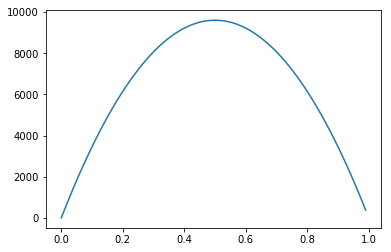

In [24]:
plt.plot(x,y)
plt.show()

In [25]:
np.max(y)

9604

In [26]:
norm.ppf(1-0.003/2)

2.9677379253417944

In [27]:
asp_mioc = proportion_confint(104, 11037)
plac_mioc= proportion_confint(189, 11034)

In [28]:
asp_mioc

(0.0076204226382885678, 0.011225278186210842)

In [29]:
plac_mioc

(0.014707877106365601, 0.019549871670143371)

In [30]:
asp_mioc

(0.0076204226382885678, 0.011225278186210842)

In [31]:
def proportions_confint_diff_ind(sample1, sample2, alpha = 0.05):  
    from scipy.stats import norm
    z = norm.ppf(1 - alpha / 2.)   
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary =  (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

   | $X_1$ | $X_2$  
  ------------- | -------------|
  1  | a | b 
  0  | c | d 
  $\sum$ | $n_1$| $n_2$
  
$$ \hat{p}_1 = \frac{a}{n_1}$$

$$ \hat{p}_2 = \frac{b}{n_2}$$


$$\text{Доверительный интервал для }p_1 - p_2\colon \;\; \hat{p}_1 - \hat{p}_2 \pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{\hat{p}_1(1 - \hat{p}_1)}{n_1} + \frac{\hat{p}_2(1 - \hat{p}_2)}{n_2}}$$

In [32]:
z = norm.ppf(1-0.05/2)
z

1.959963984540054

In [33]:
p2 = 104./11037.
p1 = 189./11034.

In [34]:
p1-p2

0.0077060239760047815

In [35]:
left_boundary =  (p1 - p2) - z * np.sqrt(p1 * (1. - p1)/11037.  + p2 * (1. - p2)/ 11034.)
right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1. - p1)/11037.  + p2 * (1. - p2)/ 11034.)

In [36]:
left_boundary

0.0046878682721335392

In [37]:
right_boundary

0.010724179679876024

In [38]:
p1-p2

0.0077060239760047815

In [39]:
asp_chance = 104./(11037.-104.)
pla_chance = 189./(11034.-189.)

In [40]:
asp_chance

0.009512485136741973

In [41]:
pla_chance

0.017427385892116183

In [42]:
pla_chance/asp_chance

1.8320539419087138

In [43]:
asp = np.array([1 if (i < 104) else 0 for i in xrange(11037)])
pla = np.array([1 if (i < 189) else 0 for i in xrange(11034)])

In [44]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [45]:
np.random.seed(0)
asp_chance_bs = np.array(map(lambda x: float(np.count_nonzero(x))/(float(len(x)) - float(np.count_nonzero(x))), get_bootstrap_samples(asp, 1000)))
pla_chance_bs = np.array(map(lambda x: float(np.count_nonzero(x))/(float(len(x)) - float(np.count_nonzero(x))), get_bootstrap_samples(pla, 1000)))

In [46]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [47]:
stat_intervals_asp_chance = stat_intervals(asp_chance_bs, 0.05)
stat_intervals_asp_chance

array([ 0.00757714,  0.0113626 ])

In [48]:
stat_intervals_pla_chance = stat_intervals(pla_chance_bs, 0.05)
stat_intervals_pla_chance

array([ 0.01499402,  0.01996672])

In [49]:
stat_intervals_pla_chance/stat_intervals_asp_chance

array([ 1.97884944,  1.75723257])

In [50]:
m = asp_chance_bs.mean()
s = asp_chance_bs.std(ddof=1)/np.sqrt(len(asp_chance_bs))
_tconfint_generic(m, s, len(asp_chance_bs) - 1, 0.05, 'two-sided')

(0.0094417282379171703, 0.0095580177668093663)

In [54]:
np.min(stat_intervals_pla_chance) / np.max(stat_intervals_asp_chance)

1.3195947489770061

In [55]:
np.max(stat_intervals_pla_chance) / np.min(stat_intervals_asp_chance)

2.6351261952969951